In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\Elizabeth\Documents\Data Analytics\course\TERM4\EN_APEI-Can-Prov_Terr.csv', encoding = 'latin1')
df.head()

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1.0,AB,Ore and Mineral Industries,NaN,NaN,y,1990.0,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1.0,BC,Ore and Mineral Industries,NaN,NaN,y,1990.0,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
2,1.0,Unspecified,Ore and Mineral Industries,NaN,NaN,y,1990.0,NaN,NaN,NaN,...,942553.747399,78483.801189,NaN,42.093600,26870.500000,25789.000000,16893.400000,10092.900000,79645.800000,5466.35
3,1.0,MB,Ore and Mineral Industries,NaN,NaN,y,1990.0,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1.0,NB,Ore and Mineral Industries,NaN,NaN,y,1990.0,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN


In [3]:
colnames = df.columns
colnames

Index(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'Is it a total',
       'Year', 'TPM (t)', 'PM10 (t)', 'PM25 (t)', 'SOX (t)', 'NOX (t)',
       'VOC (t)', 'CO (t)', 'NH3 (t)', 'Pb (kg)', 'Cd (kg)', 'Hg (kg)',
       'D/F (gTEQ)', 'B(a)p', 'B(b)f', 'B(k)f', 'I(1,2,3-cd)p', 'PAH (kg)',
       'HCB (g)'],
      dtype='object')

In [4]:
df.rename(columns = {'Is it a total':'total', 'TPM (t)':'TPM', 'PM10 (t)':'PM10', 'PM25 (t)':'PM25', 'SOX (t)':'SOX',
                    'NOX (t)':'NOX', 'VOC (t)':'VOC', 'CO (t)':'CO', 'NH3 (t)':'NH3', 'Pb (kg)':'Pb', 'Cd (kg)':'Cd',
                    'Hg (kg)':'Hg','D/F (gTEQ)':'DF', 'B(a)p':'Bap', 'B(b)f':'Bbf', 'B(k)f':'Bkf', 'I(1,2,3-cd)p':'Ip', 
                     'PAH (kg)':'PAH', 'HCB (g)':'HCB'}, inplace = True)

In [5]:
df.dtypes

Index        float64
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year         float64
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [6]:
df.shape

(66390, 25)

In [7]:
#change type of Index and Year from float64 and object respectively to int32
df['Index'] = df['Index'].astype('int')
df['Year'] = df['Year'].astype('int')
df.dtypes

Index          int32
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year           int32
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66390 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      66390 non-null  int32  
 1   Region     66390 non-null  object 
 2   Source     66390 non-null  object 
 3   Sector     61320 non-null  object 
 4   Subsector  54180 non-null  object 
 5   total      12210 non-null  object 
 6   Year       66390 non-null  int32  
 7   TPM        34032 non-null  float64
 8   PM10       33960 non-null  float64
 9   PM25       34002 non-null  float64
 10  SOX        24136 non-null  float64
 11  NOX        25801 non-null  float64
 12  VOC        30948 non-null  float64
 13  CO         25757 non-null  float64
 14  NH3        22634 non-null  float64
 15  Pb         13164 non-null  float64
 16  Cd         11829 non-null  float64
 17  Hg         20301 non-null  float64
 18  DF         14676 non-null  float64
 19  Bap        14065 non-null  float64
 20  Bbf   

In [8]:
#Count of NA's per column
df.isna().sum()

Index            0
Region           0
Source           0
Sector        5070
Subsector    12210
total        54180
Year             0
TPM          32358
PM10         32430
PM25         32388
SOX          42254
NOX          40589
VOC          35442
CO           40633
NH3          43756
Pb           53226
Cd           54561
Hg           46089
DF           51714
Bap          52325
Bbf          52386
Bkf          52787
Ip           52531
PAH          52933
HCB          59060
dtype: int64

In [9]:
#total NA's of the dataset
df.isna().sum().sum()

898922

In [12]:
df1 = df.describe()
print(round(df1, 2))

          Index      Year          TPM        PM10        PM25         SOX  \
count  66390.00  66390.00     34032.00    33960.00    34002.00    24136.00   
mean      79.54   2004.50     84379.95    26902.43     5663.52    10932.16   
std       45.63      8.66    833510.51   260958.74    51617.32    82698.84   
min        1.00   1990.00         0.00        0.00        0.00        0.00   
25%       40.00   1997.00        10.40        7.26        4.35        1.48   
50%       80.00   2004.50       149.95      101.47       60.49       45.89   
75%      119.00   2012.00      1606.78      951.23      519.88      811.31   
max      158.00   2019.00  28912967.21  8880675.05  1690838.10  3004321.65   

              NOX         VOC           CO        NH3          Pb        Cd  \
count    25801.00    30948.00     25757.00   22634.00    13164.00  11829.00   
mean     10775.76     9748.23     39647.74    2677.07     4968.40    406.64   
std      85643.38    84028.98    331672.54   20532.46    431

array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

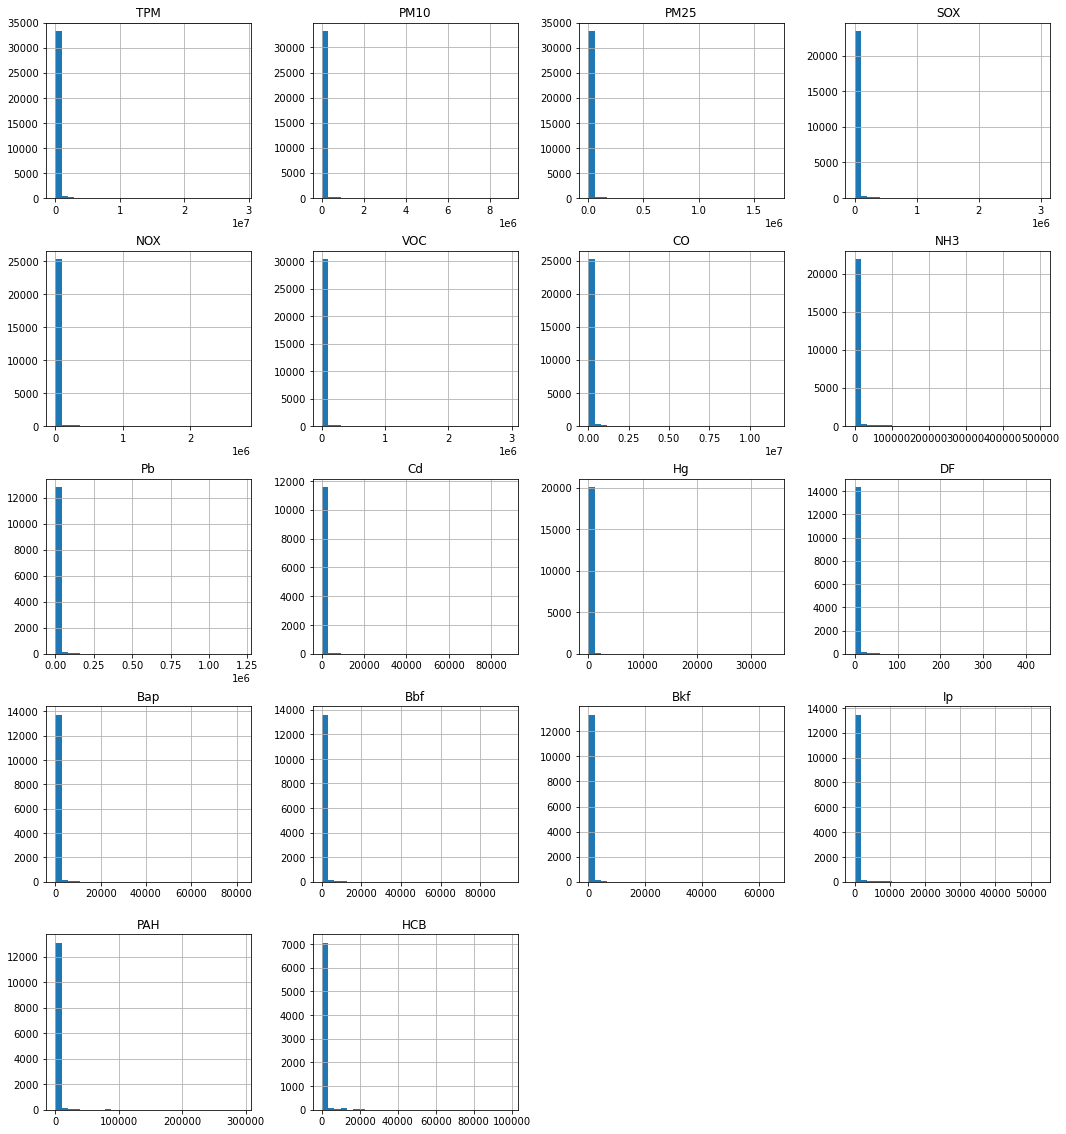

In [13]:
df_test = df.drop(['Index', 'Year'], axis=1)
df_test.hist(bins=30, figsize=(18, 20))

In [14]:
df['Region'].value_counts(dropna=False).sort_index(ascending=True)

AB             4740
BC             4740
CA               30
MB             4740
NB             4740
NL             4740
NS             4740
NT             4740
NU             4740
ON             4740
PE             4740
QC             4740
SK             4740
Unspecified    4740
YT             4740
Name: Region, dtype: int64

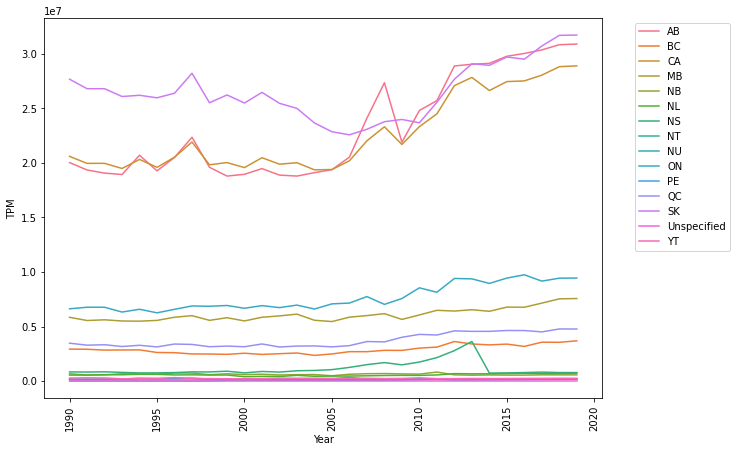

In [15]:
dfg = df.groupby(['Year', 'Region']).agg({'TPM': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='TPM', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

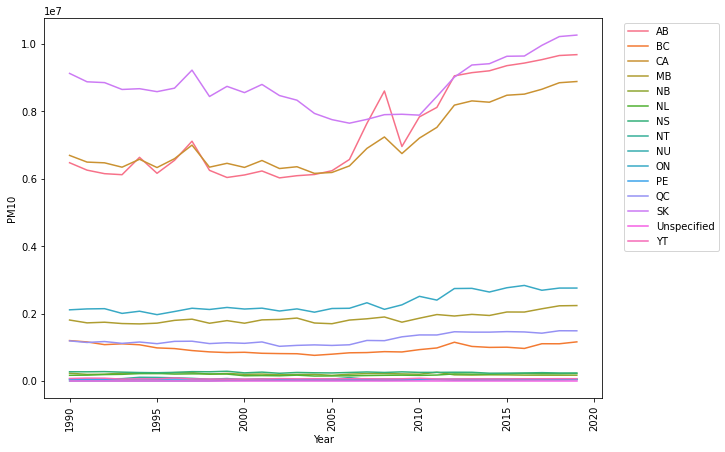

In [16]:
dfg = df.groupby(['Year', 'Region']).agg({'PM10': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM10', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

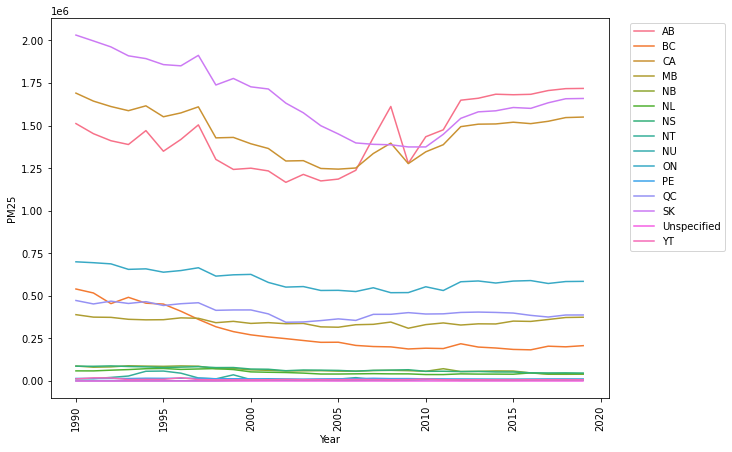

In [17]:
dfg = df.groupby(['Year', 'Region']).agg({'PM25': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM25', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

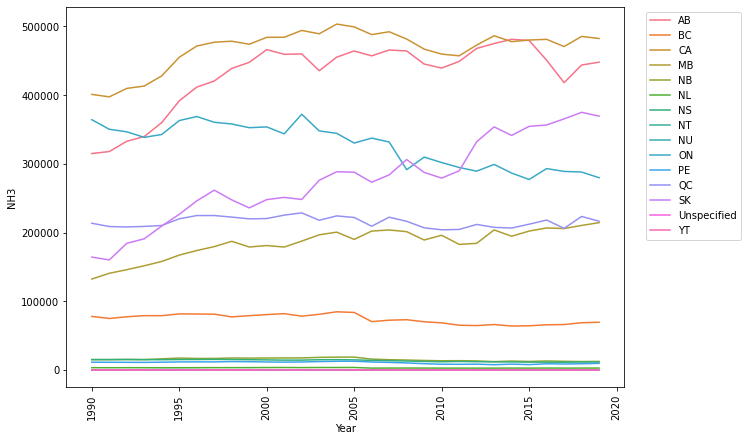

In [18]:
dfg = df.groupby(['Year', 'Region']).agg({'NH3': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='NH3', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

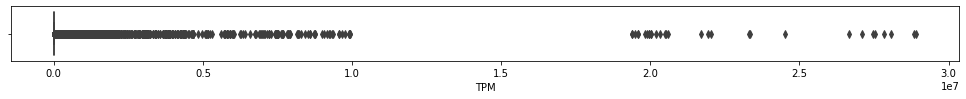

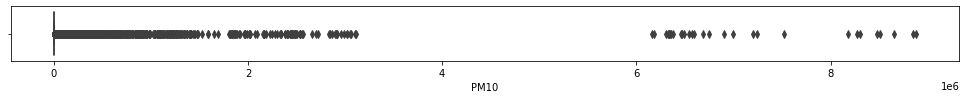

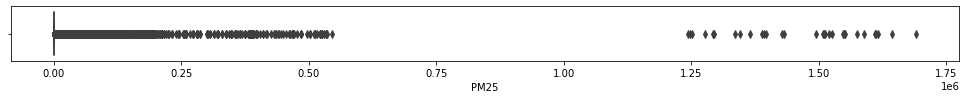

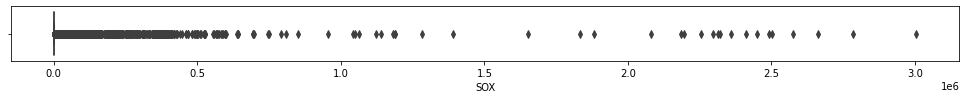

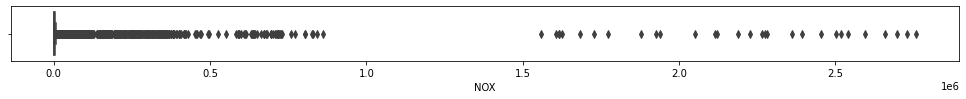

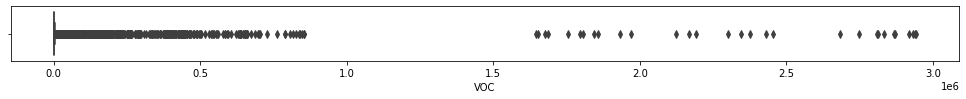

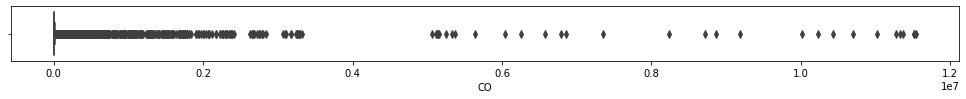

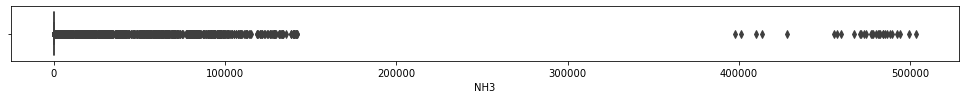

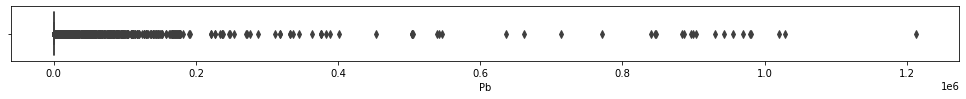

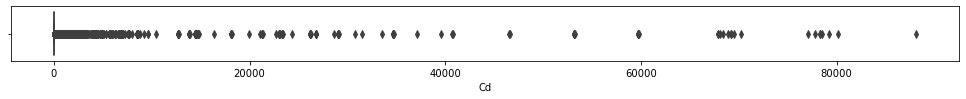

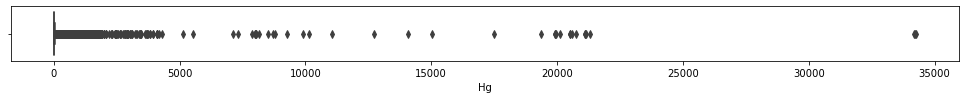

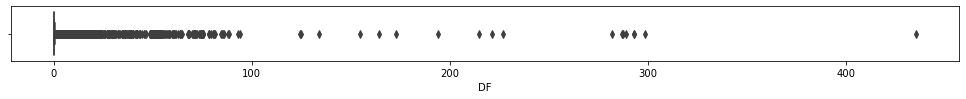

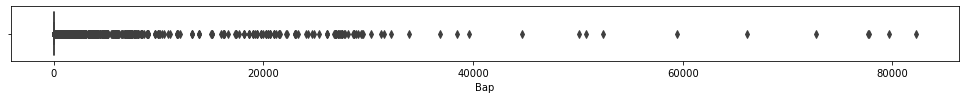

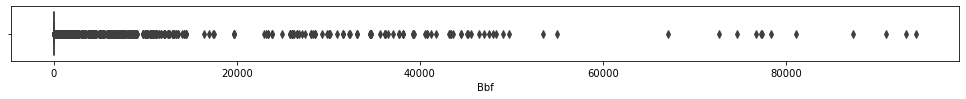

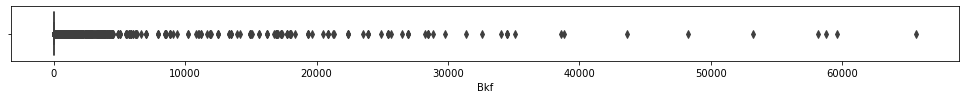

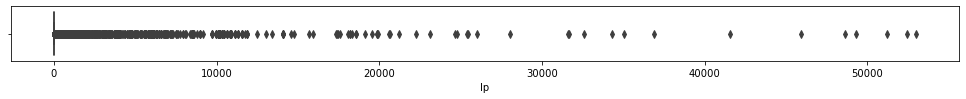

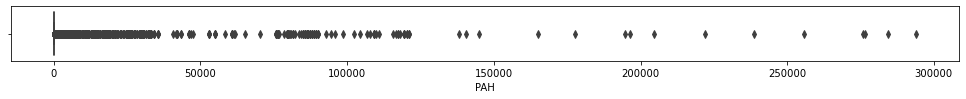

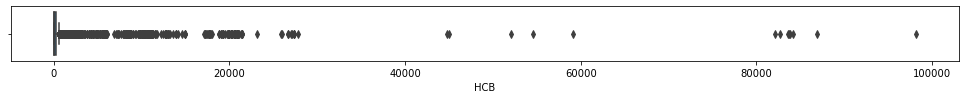

In [19]:
dfb=df.select_dtypes(exclude=['object', 'int32'])
for att in dfb:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dfb, x=att)

In [20]:
cors = df.corr(method="spearman")
cors

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
Index,1.000000,0.000000,0.021153,0.038370,0.038427,-0.250170,-0.121730,0.068194,0.018579,0.057274,-0.217164,0.002277,-0.086832,0.192831,0.125236,0.090496,0.117292,0.184822,0.105100,0.089351
Year,0.000000,1.000000,-0.077787,-0.077413,-0.081599,-0.102523,-0.028909,-0.005061,0.002787,0.019562,-0.072893,-0.053531,-0.125057,-0.068768,-0.092254,-0.046973,-0.071176,-0.063072,-0.076369,-0.106975
TPM,0.021153,-0.077787,1.000000,0.989149,0.959368,0.691783,0.707270,0.622999,0.643458,0.747389,0.634151,0.610329,0.636458,0.607424,0.584456,0.629296,0.623722,0.591100,0.627952,0.294836
PM10,0.038370,-0.077413,0.989149,1.000000,0.983743,0.698615,0.736850,0.644800,0.682774,0.736521,0.653841,0.647667,0.613253,0.612194,0.623889,0.664019,0.660787,0.628759,0.665419,0.300440
PM25,0.038427,-0.081599,0.959368,0.983743,1.000000,0.703278,0.764685,0.655935,0.722999,0.715039,0.662403,0.674476,0.598687,0.625843,0.658070,0.692454,0.691412,0.660576,0.696733,0.309082
SOX,-0.250170,-0.102523,0.691783,0.698615,0.703278,1.000000,0.775889,0.521932,0.571636,0.641981,0.682781,0.737168,0.665082,0.604719,0.490080,0.544448,0.551019,0.496766,0.535034,0.261293
NOX,-0.121730,-0.028909,0.707270,0.736850,0.764685,0.775889,1.000000,0.677694,0.802946,0.729469,0.657306,0.708522,0.492344,0.444183,0.633231,0.664170,0.663112,0.623312,0.660279,0.200153
VOC,0.068194,-0.005061,0.622999,0.644800,0.655935,0.521932,0.677694,1.000000,0.751674,0.686658,0.559337,0.594671,0.414484,0.482024,0.718381,0.741671,0.749922,0.706605,0.758412,0.338609
CO,0.018579,0.002787,0.643458,0.682774,0.722999,0.571636,0.802946,0.751674,1.000000,0.678172,0.732188,0.706782,0.395773,0.425768,0.824876,0.838195,0.835734,0.820457,0.854715,0.423040
NH3,0.057274,0.019562,0.747389,0.736521,0.715039,0.641981,0.729469,0.686658,0.678172,1.000000,0.536276,0.643407,0.597729,0.585331,0.595119,0.619511,0.628390,0.593873,0.624256,0.200843


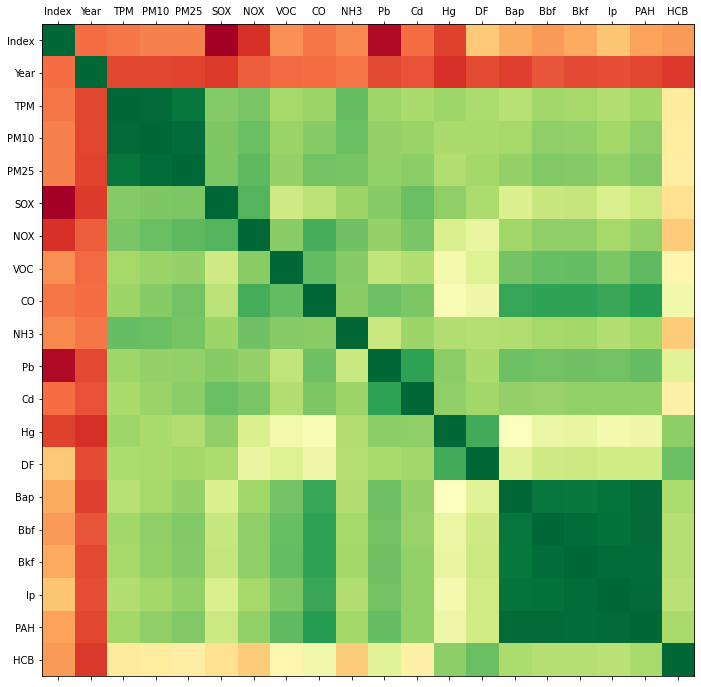

In [21]:
labels = [c[:5] for c in cors.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(cors, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [22]:
Region_count = sum(df['Region'].value_counts(dropna=False))
Region_count

66390

In [23]:
df['Source'].value_counts(dropna=False).sort_index(ascending=False)

Transportation and Mobile Equipment          7140
Paints and Solvents                          2100
Ore and Mineral Industries                  16380
Oil and Gas Industry                         7980
Manufacturing                               12600
Incineration and Waste                       5460
GRAND TOTAL                                   450
Fires                                        1260
Electric Power Generation (Utilities)        2520
Dust                                         2520
Commercial/Residential/Institutional          420
Commercial / Residential / Institutional     3780
Agriculture                                  3780
Name: Source, dtype: int64

In [24]:
df['Source'].isna().sum()

0

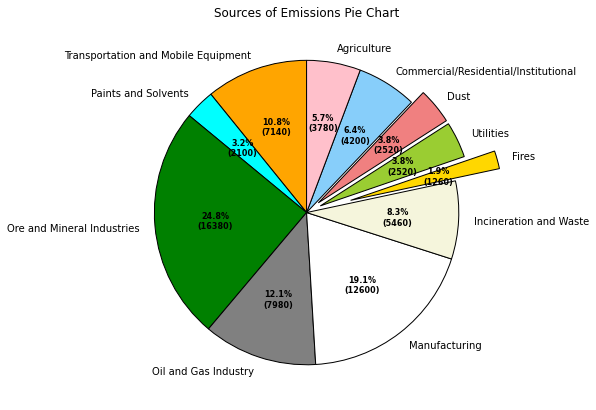

In [25]:
df['Source'].value_counts (dropna=False)

Source = ['Transportation and Mobile Equipment', 'Paints and Solvents', 'Ore and Mineral Industries', 'Oil and Gas Industry',
        'Manufacturing', 'Incineration and Waste', 'Fires', 'Utilities', 'Dust', 'Commercial/Residential/Institutional',
        'Agriculture'] 
data = [7140, 2100, 16380, 7980, 12600, 5460, 1260, 2520, 2520, 4200, 3780]
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0)
colors = ( 'orange', 'cyan', 'green', 'grey', 'white', 'beige',
          'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink')  
wp = { 'linewidth' : 1, 'edgecolor' : 'black' } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return '{:.1f}%\n({:d})'.format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
    autopct = lambda pct: func(pct, data), 
    explode = explode,
    labels = Source,  
    colors = colors, 
    startangle = 90, 
    wedgeprops = wp, 
    textprops = dict(color ='black')) 

plt.setp(autotexts, size=8, weight='bold')

ax.set_title('Sources of Emissions Pie Chart')

plt.show() 

In [26]:
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing          420
Air Transportation (LTO)         420
Aluminium Industry              1680
Animal Production                420
Asphalt Paving Industry          420
                                ... 
Waste Incineration              2100
Waste Materials                  420
Waste Treatment and Disposal    2520
Wood Products                   1680
NaN                             5070
Name: Sector, Length: 74, dtype: int64

In [27]:
df['Sector'] = df['Sector'].fillna('Unspecified')
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing                                        420
Air Transportation (LTO)                                       420
Aluminium Industry                                            1680
Animal Production                                              420
Asphalt Paving Industry                                        420
                                                              ... 
Vehicle Manufacturing (Engines, Parts, Assembly, Painting)     420
Waste Incineration                                            2100
Waste Materials                                                420
Waste Treatment and Disposal                                  2520
Wood Products                                                 1680
Name: Sector, Length: 74, dtype: int64

In [28]:
df['Sector'].isna().sum()

0

In [29]:
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing               420
Accidents and Equipment Failures      420
Air Transportation (LTO)              420
Alumina (Bauxite Refining)            420
Animal Production                     420
                                    ...  
Waste Materials                       420
Waste Sorting and Transfer            420
Well Drilling/Servicing/Testing       420
Wind Erosion                          420
NaN                                 12210
Name: Subsector, Length: 130, dtype: int64

In [30]:
df['Subsector'] = df['Subsector'].fillna('No_subsector')
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing             420
Accidents and Equipment Failures    420
Air Transportation (LTO)            420
Alumina (Bauxite Refining)          420
Animal Production                   420
                                   ... 
Warehousing and Storage             420
Waste Materials                     420
Waste Sorting and Transfer          420
Well Drilling/Servicing/Testing     420
Wind Erosion                        420
Name: Subsector, Length: 130, dtype: int64

In [31]:
df['Subsector'].isna().sum()

0

In [32]:
df['total'].value_counts(dropna=False)

NaN    54180
y      12210
Name: total, dtype: int64

In [33]:
df['total'] = df['total'].fillna('n')
df['total'].value_counts(dropna=False)

n    54180
y    12210
Name: total, dtype: int64

In [34]:
df['total'].isna().sum()

0

In [35]:
df2 = df[df.Region != 'Unspecified']
df2.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [36]:
df3 = df2[df2.Region != 'CA']
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [38]:
df3.fillna(0, inplace=True)
df3.head()

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,0.0


In [37]:
df3.isna().sum()

Index            0
Region           0
Source           0
Sector           0
Subsector        0
total            0
Year             0
TPM          27618
PM10         27690
PM25         27648
SOX          37514
NOX          35849
VOC          30702
CO           35893
NH3          39016
Pb           48964
Cd           50205
Hg           41349
DF           47268
Bap          47836
Bbf          47955
Bkf          48318
Ip           48065
PAH          48427
HCB          54598
dtype: int64

In [38]:
#round to two decimal places
df3 = df3.round(decimals = 2)
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.26,8171.57,2874.89,...,416.16,5.77,92.82,0.0,0.41,1.43,0.51,0.41,2.75,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.86,11296.73,6158.37,...,57.77,1.85,3084.90,0.0,9.16,12.69,12.11,5.06,39.03,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.34,6530.92,3287.36,...,28.56,0.53,19959.68,0.0,0.04,0.13,0.05,0.04,0.25,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.68,1529.10,651.46,...,18.29,0.95,121.56,0.0,0.10,0.35,0.12,0.10,0.67,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.26,3670.51,1494.64,...,46.04,0.38,62.83,0.0,0.01,0.04,0.02,0.01,0.09,NaN


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61620 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      61620 non-null  int32  
 1   Region     61620 non-null  object 
 2   Source     61620 non-null  object 
 3   Sector     61620 non-null  object 
 4   Subsector  61620 non-null  object 
 5   total      61620 non-null  object 
 6   Year       61620 non-null  int32  
 7   TPM        34002 non-null  float64
 8   PM10       33930 non-null  float64
 9   PM25       33972 non-null  float64
 10  SOX        24106 non-null  float64
 11  NOX        25771 non-null  float64
 12  VOC        30918 non-null  float64
 13  CO         25727 non-null  float64
 14  NH3        22604 non-null  float64
 15  Pb         12656 non-null  float64
 16  Cd         11415 non-null  float64
 17  Hg         20271 non-null  float64
 18  DF         14352 non-null  float64
 19  Bap        13784 non-null  float64
 20  Bbf   

In [40]:
df3.describe()

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
count,61620.000000,61620.000000,3.400200e+04,3.393000e+04,33972.000000,2.410600e+04,25771.000000,30918.000000,2.572700e+04,22604.000000,12656.000000,11415.000000,20271.000000,14352.000000,13784.000000,13665.000000,13302.000000,13555.000000,13193.000000,7022.000000
mean,79.500000,2004.500000,6.449783e+04,2.064169e+04,4380.801627,8.614056e+03,8277.924928,7514.071485,3.024489e+04,2059.228657,3039.945056,255.785709,58.472221,1.091407,257.303999,383.621828,183.688709,204.314284,1060.679768,523.532786
std,45.610128,8.655512,4.867046e+05,1.518402e+05,28052.814137,4.450332e+04,42532.426639,41302.823537,1.644191e+05,11534.469322,20939.061120,2191.857134,553.664312,6.100861,1583.967268,2668.877356,1510.686029,1076.329470,6800.570915,2384.443495
min,1.000000,1990.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1997.000000,1.036250e+01,7.250000e+00,4.330000,1.470000e+00,27.110000,14.062500,3.225500e+01,0.707500,0.850000,0.110000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.060000,0.000000
50%,79.500000,2004.500000,1.493400e+02,1.009850e+02,60.280000,4.553500e+01,250.080000,191.020000,4.367200e+02,8.360000,18.065000,2.260000,0.950000,0.010000,0.370000,0.340000,0.200000,0.220000,1.400000,1.600000
75%,119.000000,2012.000000,1.593620e+03,9.463000e+02,516.927500,8.054775e+02,2328.175000,1512.537500,3.771680e+03,89.647500,148.825000,18.500000,13.090000,0.180000,12.630000,11.320000,5.200000,9.320000,42.550000,192.920000
max,158.000000,2019.000000,9.930312e+06,3.108116e+06,545334.340000,1.123190e+06,860792.630000,854321.660000,3.326566e+06,141887.550000,504786.170000,59774.530000,21310.710000,133.750000,33922.150000,49765.450000,38591.080000,20630.540000,138287.270000,27337.940000


array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

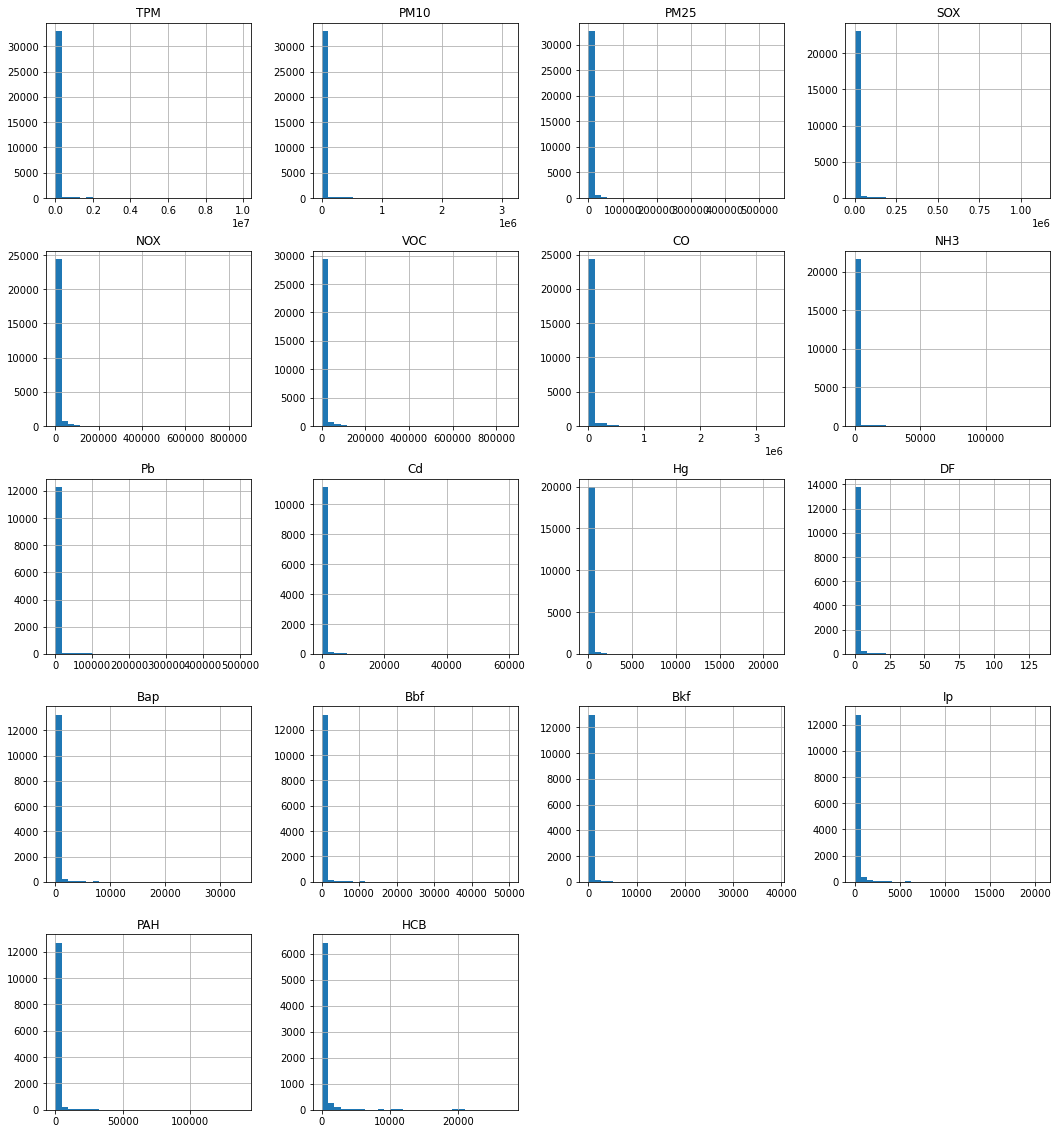

In [41]:
df3_test = df3.drop(['Index', 'Year'], axis=1)
df3_test.hist(bins=30, figsize=(18, 20))